Populating the interactive namespace from numpy and matplotlib
Creating networks and loading parameters


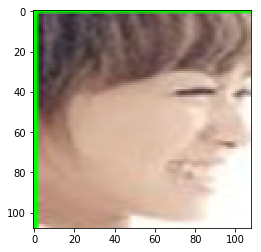

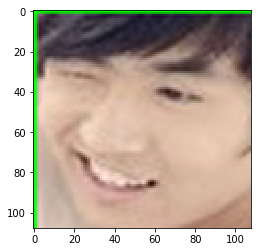

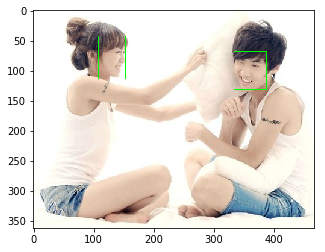

In [26]:
# %load face-detection.py
from scipy import misc
import tensorflow as tf
import detect_face
import cv2
import matplotlib.pyplot as plt
%pylab inline

minsize = 20 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor
gpu_memory_fraction=1.0


print('Creating networks and loading parameters')

with tf.Graph().as_default():
        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
        sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
        with sess.as_default():
            pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

image_path = 'D:/PythonSpace/AICamp/week2/train_not/happiness-18127.jpg'

img = misc.imread(image_path)
bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
nrof_faces = bounding_boxes.shape[0]#人脸数目
# print('找到人脸数目为：{}'.format(nrof_faces))

# print(bounding_boxes)

crop_faces=[]
for face_position in bounding_boxes:
    face_position=face_position.astype(int)
#     print(face_position[0:4])
    cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 1)
    crop=img[face_position[1]:face_position[3],
             face_position[0]:face_position[2],]

    crop = cv2.resize(crop, (108, 108), interpolation=cv2.INTER_CUBIC )
#     print(crop.shape)
    crop_faces.append(crop)
    plt.imshow(crop)
    plt.show()

plt.imshow(img)
plt.show()


In [32]:
# %load face-detection.py
from scipy import misc
import tensorflow as tf
import detect_face
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
%pylab inline

minsize = 20 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor
gpu_memory_fraction=1.0


print('Creating networks and loading parameters')

with tf.Graph().as_default():
        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
        sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
        with sess.as_default():
            pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

            

imgsrc = 'D:/PythonSpace/AICamp/week2/trainnottest/'     
for imgName in tqdm(os.listdir(imgsrc)):
    image_path = imgsrc+imgName
    print(image_path)
    img = cv2.imread(image_path)
    bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
    nrof_faces = bounding_boxes.shape[0]#人脸数目
    print('找到人脸数目为：{}'.format(nrof_faces))

    # print(bounding_boxes)
    if nrof_faces == 0:
        cv2.imwrite('D:/PythonSpace/AICamp/week2/train2not/'+str(imgName),img)
    else:
        crop_faces=[]
        face_position = bounding_boxes[0]
        face_position=face_position.astype(int)
        #     print(face_position[0:4])
        cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 1)
        crop=img[face_position[1]:face_position[3],
        face_position[0]:face_position[2],]
        crop = cv2.resize(crop, (108, 108), interpolation=cv2.INTER_CUBIC )
        tosrc = ''
        cv2.imwrite('D:/PythonSpace/AICamp/week2/train2de/' + str(imgName), crop)
    





# image_path = 'D:/PythonSpace/AICamp/week2/train_not/anger-284.jpg'

# img = cv2.imread(image_path)
# bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
# # nrof_faces = bounding_boxes.shape[0]#人脸数目
# # print('找到人脸数目为：{}'.format(nrof_faces))

# # print(bounding_boxes)

# crop_faces=[]
# face_position = bounding_boxes[0]
# face_position=face_position.astype(int)
# #     print(face_position[0:4])
# cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 1)
# crop=img[face_position[1]:face_position[3],
# face_position[0]:face_position[2],]

# crop = cv2.resize(crop, (108, 108), interpolation=cv2.INTER_CUBIC )
# #     print(crop.shape)
# # crop_faces.append(crop)
# cv2.imwrite('./tfmtcnn.jpg',crop,[int(cv2.IMWRITE_JPEG_QUALITY), 100])
# plt.imshow(crop)
# plt.show()

# plt.imshow(img)
# plt.show()


Populating the interactive namespace from numpy and matplotlib
Creating networks and loading parameters


  0%|                                                   | 0/18 [00:00<?, ?it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-105.jpg
找到人脸数目为：0


  6%|██▍                                        | 1/18 [00:00<00:03,  5.05it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-161.jpg
找到人脸数目为：0


 11%|████▊                                      | 2/18 [00:00<00:03,  4.47it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-182.jpg
找到人脸数目为：1


 17%|███████▏                                   | 3/18 [00:01<00:08,  1.69it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-186.jpg
找到人脸数目为：0


 22%|█████████▌                                 | 4/18 [00:01<00:06,  2.06it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-201.jpg
找到人脸数目为：0


 28%|███████████▉                               | 5/18 [00:02<00:05,  2.23it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-212.jpg
找到人脸数目为：1


 33%|██████████████▎                            | 6/18 [00:02<00:05,  2.38it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-215.jpg
找到人脸数目为：1


 39%|████████████████▋                          | 7/18 [00:02<00:04,  2.57it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-218.jpg
找到人脸数目为：0


 44%|███████████████████                        | 8/18 [00:03<00:04,  2.30it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-220.jpg
找到人脸数目为：1


 50%|█████████████████████▌                     | 9/18 [00:03<00:03,  2.46it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-236.jpg
找到人脸数目为：1


 56%|███████████████████████▎                  | 10/18 [00:03<00:03,  2.58it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-243.jpg
找到人脸数目为：0


 61%|█████████████████████████▋                | 11/18 [00:04<00:03,  2.28it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-250.jpg
找到人脸数目为：0


 67%|████████████████████████████              | 12/18 [00:05<00:02,  2.04it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-280.jpg
找到人脸数目为：0


 72%|██████████████████████████████▎           | 13/18 [00:07<00:02,  1.73it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-283.jpg
找到人脸数目为：1


 78%|████████████████████████████████▋         | 14/18 [00:07<00:02,  1.80it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-284.jpg
找到人脸数目为：1


 83%|███████████████████████████████████       | 15/18 [00:08<00:01,  1.77it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-287.jpg
找到人脸数目为：1


 89%|█████████████████████████████████████▎    | 16/18 [00:09<00:01,  1.77it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-291.jpg
找到人脸数目为：1


 94%|███████████████████████████████████████▋  | 17/18 [00:09<00:00,  1.85it/s]

D:/PythonSpace/AICamp/week2/trainnottest/anger-58.jpg
找到人脸数目为：0


100%|██████████████████████████████████████████| 18/18 [00:09<00:00,  1.94it/s]
